# 데이터 불러오기

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.data,data.target,test_size = .3, random_state = 0)

# 모델링

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_score = knn.fit(X_train, y_train).score(X_test, y_test)

In [4]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree_score = dtree.fit(X_train, y_train).score(X_test, y_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_score = rf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\rltjq\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_score = xgb.fit(X_train, y_train).score(X_test, y_test)

ModuleNotFoundError: No module named 'sklearn.xgboost'

In [8]:
display(knn_score, dtree_score, rf_score, xgb_score)

0.9473684210526315

0.9298245614035088

0.9239766081871345

# 모델 앙상블

## Voting Classifier

서로 다른 모델을 연결하여 Voting해주는 방법이다.

### Voting predictions

In [9]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators = [('xgb', xgb), ('tree', tree), ('knn', knn)],
    voting = 'hard')

NameError: name 'xgb' is not defined

In [35]:
from sklearn.metrics import accuracy_score

for clf in (xgb, tree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

XGBClassifier 0.9649122807017544
DecisionTreeClassifier 0.9181286549707602
KNeighborsClassifier 0.9473684210526315
VotingClassifier 0.9824561403508771


### Averaging predictions

In [36]:
averaging = VotingClassifier(
    estimators = [('xgb', xgb), ('tree', tree), ('knn', knn)],
    voting = 'soft')

In [37]:
averaging.fit(X_train, y_train).score(X_test, y_test)

0.9707602339181286

## Stacking

서로 다른 모델의 결과값을 바탕으로 다시 한 번 모델링을 해주는 방법이다.

<img align='left' src="https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png" width=500 height=400>

In [ ]:
#!pip install mlxtend

In [71]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score

import numpy as np
np.random.seed(1671) #결과 값이 변하지 않도록 고정시켜준다.

logreg = LogisticRegression()

stacking_1 = StackingClassifier(classifiers=[dtree, rf, knn], 
                              meta_classifier= logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

stacking_2 = StackingClassifier(classifiers=[dtree, rf, xgb], 
                              meta_classifier= logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

In [72]:
for clf in (dtree, xgb, knn, stacking_1) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

DecisionTreeClassifier 0.9181286549707602
XGBClassifier 0.9649122807017544
KNeighborsClassifier 0.9473684210526315
StackingClassifier 0.9532163742690059


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
for clf in (dtree, xgb, rf, stacking_2) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

DecisionTreeClassifier 0.9122807017543859
XGBClassifier 0.9649122807017544
RandomForestClassifier 0.9298245614035088
StackingClassifier 0.9707602339181286


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* meta 모델의 경우에는 단순한 모델을 해주는 것이 좋다.

## Ensemble 성능평가

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimiz

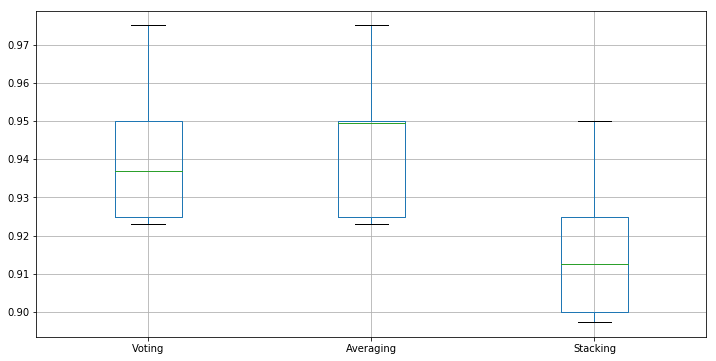

In [48]:
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Voting','Averaging','Stacking']
models = [voting, averaging, stacking]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()

# Model의 결과값을 앙상블할 때, 고려해야하는 가장 큰 2가지 : 
## <span style="color:red">모델의 성능, 모델 간 이질성</span>



## submission 간 상관성

In [55]:
knn_pred = knn.fit(X_train, y_train).predict(X_test)
dtree_pred = dtree.fit(X_train, y_train).predict(X_test)
rf_pred = rf.fit(X_train, y_train).predict(X_test)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
logreg_pred = logreg.fit(X_train, y_train).predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
pred_cor = pd.DataFrame({'dtree' : dtree_pred,
             'rf' : rf_pred,
             'xgb' : xgb_pred,
             'knn' : knn_pred,
             'logreg' : logreg_pred})

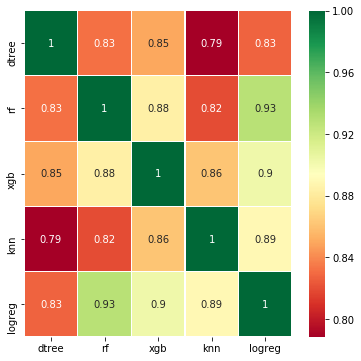

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pred_cor.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #titanic.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [81]:
averaging = VotingClassifier(
    estimators = [('tree', dtree), ('xgb', xgb)],
    voting = 'soft')

In [82]:
averaging.fit(X_train, y_train).score(X_test, y_test)

0.9239766081871345

In [83]:
averaging = VotingClassifier(
    estimators = [('tree', dtree), ('knn', knn)],
    voting = 'soft')

In [84]:
averaging.fit(X_train, y_train).score(X_test, y_test)

0.9122807017543859